In [42]:
import pandas as pd

In [43]:
df = pd.read_csv("landslide_nepal.csv",index_col=0)

In [44]:
df.columns

Index(['YEAR', 'MONTH', 'DISTRICT', 'landslide_size', 'fatality_count',
       'injury_count', 'latitude', 'longitude', 'PRECTOT', 'PS', 'QV2M',
       'RH2M', 'T2M', 'T2MWET', 'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS',
       'WS10M', 'WS10M_MAX', 'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX',
       'WS50M_MIN', 'WS50M_RANGE', 'output'],
      dtype='object')

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [46]:

df

,YEAR,MONTH,DISTRICT,landslide_size,fatality_count,injury_count,latitude,longitude,PRECTOT,PS,QV2M,RH2M,T2M,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,output
0,2013,7,Syangja,medium,1.0,0.0,27.914200,83.787600,413.84,85.41,17.31,88.30,22.02,19.70,25.15,19.24,5.90,22.44,2.11,4.06,0.46,3.61,2.36,3.84,0.74,3.10,1
1,2017,6,Kaski,medium,0.0,1.0,28.281201,83.864415,220.45,77.91,12.83,74.56,18.58,13.26,22.78,14.70,8.08,19.22,2.25,4.49,0.41,4.08,2.21,3.79,0.55,3.25,1
2,2004,6,Salyan,no,0.0,0.0,28.400000,82.100000,214.13,88.50,13.91,59.08,26.01,16.80,31.00,21.43,9.57,26.71,3.05,5.41,1.06,4.36,3.95,5.92,1.67,4.25,0
3,2015,8,Kathmandu,medium,1.0,0.0,28.029700,85.093400,388.41,83.61,16.86,90.95,20.86,18.92,23.92,18.36,5.57,21.23,2.25,4.48,0.58,3.90,2.49,4.31,0.88,3.43,1
4,2017,3,Baglung,large,1.0,0.0,28.308297,83.174393,66.43,79.29,4.78,47.96,10.37,-0.91,17.07,4.87,12.19,9.36,2.37,4.95,0.47,4.48,2.41,4.48,0.52,3.96,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,2018,7,Bardiya,no,0.0,0.0,28.450000,81.300000,18.58,93.90,20.07,78.74,28.20,23.97,31.60,25.14,6.47,28.46,2.35,4.12,0.83,3.28,3.29,5.02,1.39,3.64,0
511,2013,7,Solukhumbu,medium,0.0,0.0,27.500100,86.866900,119.03,56.27,8.32,75.37,6.87,2.68,12.59,2.06,10.53,9.49,2.64,4.86,0.64,4.21,2.66,4.59,0.81,3.78,1
512,1990,4,Dhanusa,no,0.0,0.0,26.700000,85.900000,4.08,97.58,4.67,17.98,29.48,1.90,37.93,21.35,16.58,30.42,3.43,5.92,1.30,4.62,4.96,7.50,1.85,5.65,0
513,2007,8,Gulmi,medium,3.0,0.0,28.087700,83.097100,353.59,79.79,15.26,90.54,18.58,16.62,21.80,15.73,6.07,19.02,2.23,4.41,0.59,3.82,2.48,4.10,0.91,3.20,1


In [47]:
landslides_gone = df[df['output']==1]

In [48]:
landslides_gone

,YEAR,MONTH,DISTRICT,landslide_size,fatality_count,injury_count,latitude,longitude,PRECTOT,PS,QV2M,RH2M,T2M,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,output
0,2013,7,Syangja,medium,1.0,0.0,27.914200,83.787600,413.84,85.41,17.31,88.30,22.02,19.70,25.15,19.24,5.90,22.44,2.11,4.06,0.46,3.61,2.36,3.84,0.74,3.10,1
1,2017,6,Kaski,medium,0.0,1.0,28.281201,83.864415,220.45,77.91,12.83,74.56,18.58,13.26,22.78,14.70,8.08,19.22,2.25,4.49,0.41,4.08,2.21,3.79,0.55,3.25,1
3,2015,8,Kathmandu,medium,1.0,0.0,28.029700,85.093400,388.41,83.61,16.86,90.95,20.86,18.92,23.92,18.36,5.57,21.23,2.25,4.48,0.58,3.90,2.49,4.31,0.88,3.43,1
4,2017,3,Baglung,large,1.0,0.0,28.308297,83.174393,66.43,79.29,4.78,47.96,10.37,-0.91,17.07,4.87,12.19,9.36,2.37,4.95,0.47,4.48,2.41,4.48,0.52,3.96,1
5,2010,7,Kaski,medium,3.0,0.0,28.220201,84.177585,221.56,78.01,14.73,85.42,18.61,15.57,22.24,15.52,6.72,19.86,2.63,5.05,0.53,4.51,2.55,4.26,0.77,3.49,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,2009,12,Palpa,medium,4.0,0.0,27.721100,83.469200,4.94,93.20,5.34,48.45,14.27,3.31,21.11,9.99,11.13,12.29,1.84,3.46,0.61,2.85,2.38,3.91,0.73,3.18,1
507,2010,10,Palpa,medium,0.0,0.0,27.881599,83.777624,39.54,92.76,14.09,79.43,21.71,17.71,25.87,18.46,7.42,20.90,1.68,2.88,0.57,2.31,2.18,3.32,0.80,2.52,1
511,2013,7,Solukhumbu,medium,0.0,0.0,27.500100,86.866900,119.03,56.27,8.32,75.37,6.87,2.68,12.59,2.06,10.53,9.49,2.64,4.86,0.64,4.21,2.66,4.59,0.81,3.78,1
513,2007,8,Gulmi,medium,3.0,0.0,28.087700,83.097100,353.59,79.79,15.26,90.54,18.58,16.62,21.80,15.73,6.07,19.02,2.23,4.41,0.59,3.82,2.48,4.10,0.91,3.20,1


In [54]:
landslides_gone['DISTRICT'].value_counts()

Baglung          24
Kathmandu        15
Dhading          14
Gulmi            14
Taplejung        13
Palpa            13
Nuwakot          11
Syangja          10
Myagdi           10
Kaski            10
Rasuwa            8
Parbat            8
Sankhuwasabha     7
Lamjung           7
Dang              6
Ilam              6
Gorkha            5
Rukum             5
Dailekh           5
Baitadi           5
Mugu              5
Dadeldhura        4
Bara              4
Sindhuli          4
Nawalparasi       4
Udayapur          4
Solukhumbu        4
Arghakhanchi      3
Surkhet           3
Okhaldhunga       3
Darchula          3
Doti              3
Dhankuta          3
Jumla             3
Kailali           2
Salyan            2
Saptari           1
Mustang           1
Bardiya           1
Bhaktapur         1
Banke             1
Terhathum         1
Lalitpur          1
Humla             1
Name: DISTRICT, dtype: int64

Text(0.5, 1.0, 'Districts By Numbers of Landslide events Since 1980')

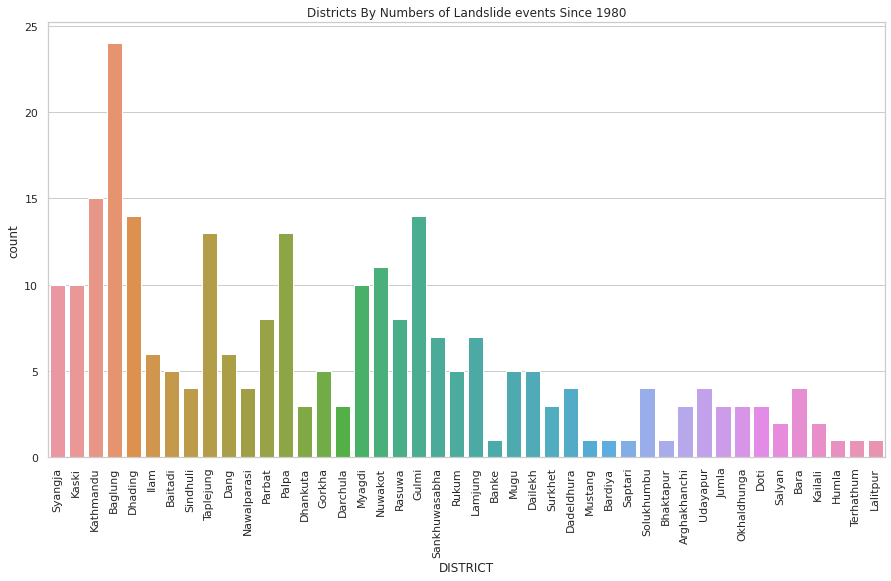

In [104]:
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.countplot(x="DISTRICT", data=landslides_gone)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Districts By Numbers of Landslide events Since 1980")

Text(0.5, 1.0, 'Size of landslides')

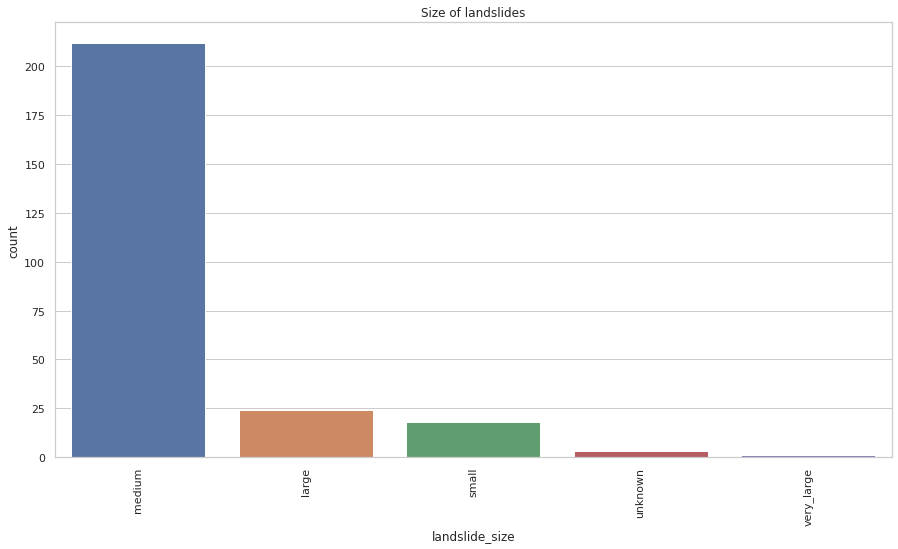

In [105]:
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax1 = sns.countplot(x="landslide_size", data=landslides_gone)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title("Size of landslides")

In [86]:
landslides_gone

,YEAR,MONTH,DISTRICT,landslide_size,fatality_count,injury_count,latitude,longitude,PRECTOT,PS,QV2M,RH2M,T2M,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,output
0,2013,7,Syangja,medium,1.0,0.0,27.914200,83.787600,413.84,85.41,17.31,88.30,22.02,19.70,25.15,19.24,5.90,22.44,2.11,4.06,0.46,3.61,2.36,3.84,0.74,3.10,1
1,2017,6,Kaski,medium,0.0,1.0,28.281201,83.864415,220.45,77.91,12.83,74.56,18.58,13.26,22.78,14.70,8.08,19.22,2.25,4.49,0.41,4.08,2.21,3.79,0.55,3.25,1
3,2015,8,Kathmandu,medium,1.0,0.0,28.029700,85.093400,388.41,83.61,16.86,90.95,20.86,18.92,23.92,18.36,5.57,21.23,2.25,4.48,0.58,3.90,2.49,4.31,0.88,3.43,1
4,2017,3,Baglung,large,1.0,0.0,28.308297,83.174393,66.43,79.29,4.78,47.96,10.37,-0.91,17.07,4.87,12.19,9.36,2.37,4.95,0.47,4.48,2.41,4.48,0.52,3.96,1
5,2010,7,Kaski,medium,3.0,0.0,28.220201,84.177585,221.56,78.01,14.73,85.42,18.61,15.57,22.24,15.52,6.72,19.86,2.63,5.05,0.53,4.51,2.55,4.26,0.77,3.49,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,2009,12,Palpa,medium,4.0,0.0,27.721100,83.469200,4.94,93.20,5.34,48.45,14.27,3.31,21.11,9.99,11.13,12.29,1.84,3.46,0.61,2.85,2.38,3.91,0.73,3.18,1
507,2010,10,Palpa,medium,0.0,0.0,27.881599,83.777624,39.54,92.76,14.09,79.43,21.71,17.71,25.87,18.46,7.42,20.90,1.68,2.88,0.57,2.31,2.18,3.32,0.80,2.52,1
511,2013,7,Solukhumbu,medium,0.0,0.0,27.500100,86.866900,119.03,56.27,8.32,75.37,6.87,2.68,12.59,2.06,10.53,9.49,2.64,4.86,0.64,4.21,2.66,4.59,0.81,3.78,1
513,2007,8,Gulmi,medium,3.0,0.0,28.087700,83.097100,353.59,79.79,15.26,90.54,18.58,16.62,21.80,15.73,6.07,19.02,2.23,4.41,0.59,3.82,2.48,4.10,0.91,3.20,1


In [99]:
aggregation_functions = {'fatality_count': 'sum', 'injury_count': 'sum'}
df_new = landslides_gone.groupby(landslides_gone['DISTRICT']).aggregate(aggregation_functions)
df_new.reset_index(inplace=True)


In [119]:
df_new

,DISTRICT,fatality_count,injury_count
41,Taplejung,89.0,20.0
21,Kathmandu,39.0,2.0
28,Nuwakot,32.0,7.0
20,Kaski,30.0,16.0
19,Kailali,28.0,3.0
15,Gulmi,25.0,0.0
11,Dhading,25.0,2.0
1,Baglung,23.0,4.0
33,Rukum,20.0,0.0
40,Syangja,16.0,0.0


Text(0.5, 1.0, 'Districts by fatalities')

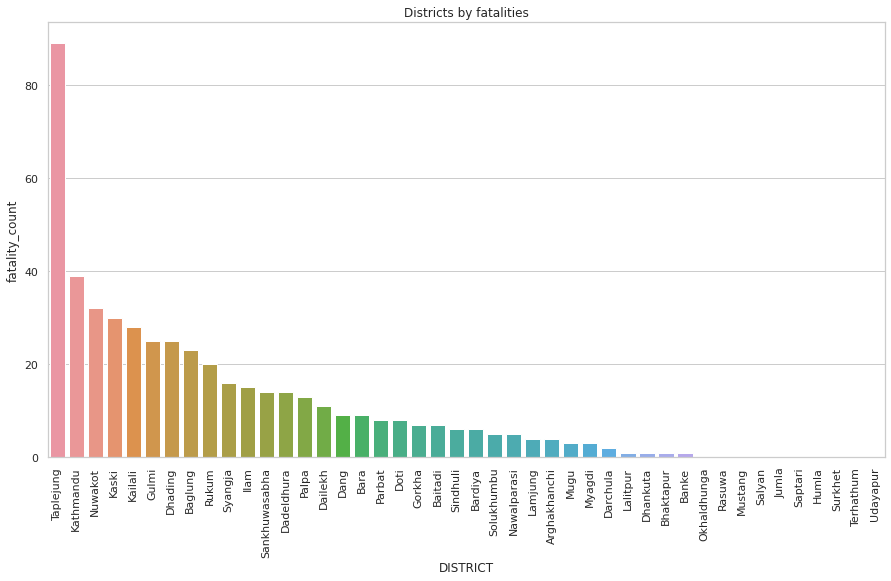

In [108]:
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax2 = sns.barplot(x="DISTRICT", y="fatality_count", data=df_new)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_title("Districts by fatalities")

Text(0.5, 1.0, 'Districts by Injuries')

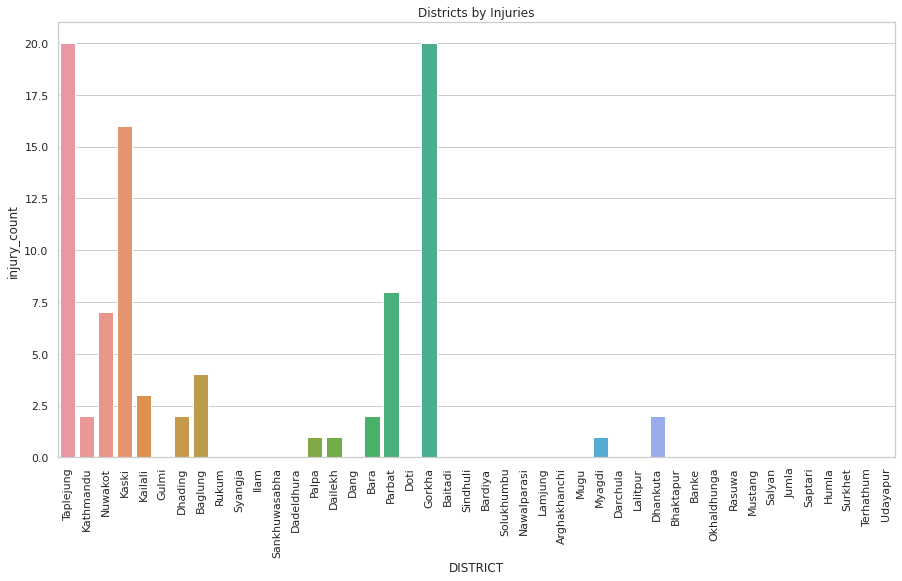

In [109]:
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax2 = sns.barplot(x="DISTRICT", y="injury_count", data=df_new)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_title("Districts by Injuries")

Text(0.5, 1.0, 'Fatalities by landslide size')

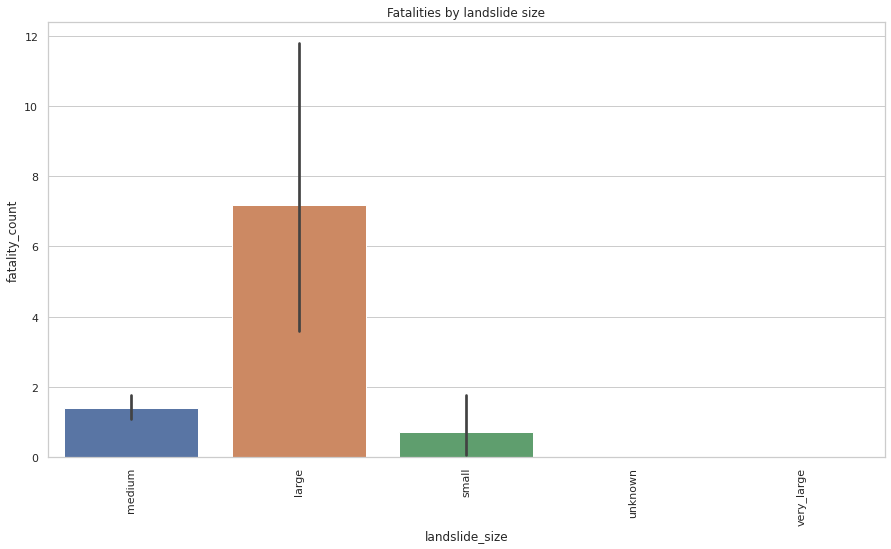

In [118]:
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax2 = sns.barplot(x="landslide_size", y="fatality_count", data=landslides_gone)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_title("Fatalities by landslide size")

Text(0.5, 1.0, 'Precipitation range')

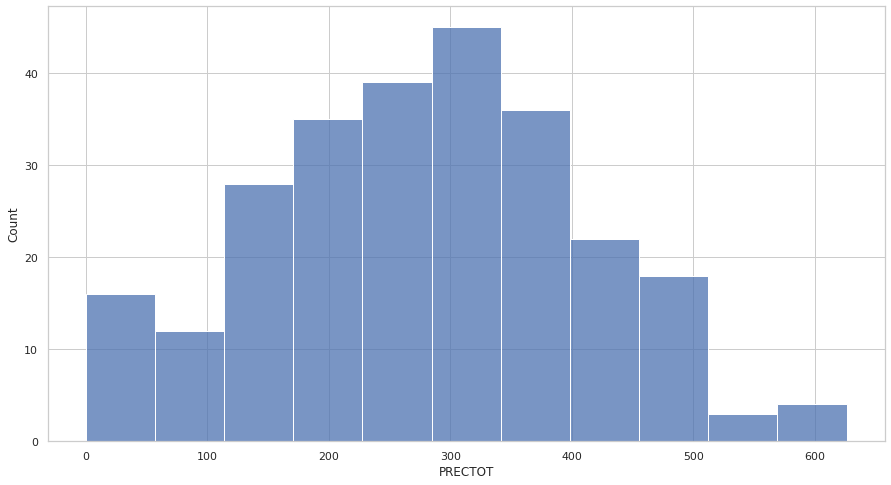

In [125]:
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
sns.histplot(data=landslides_gone, x="PRECTOT")
ax2.set_title("Precipitation range")

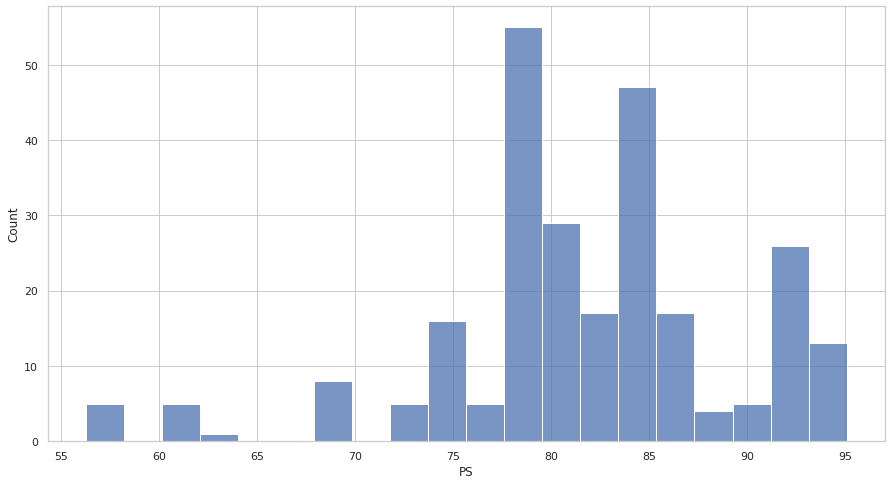

In [130]:
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
sns.histplot(data=landslides_gone, x="PS")				


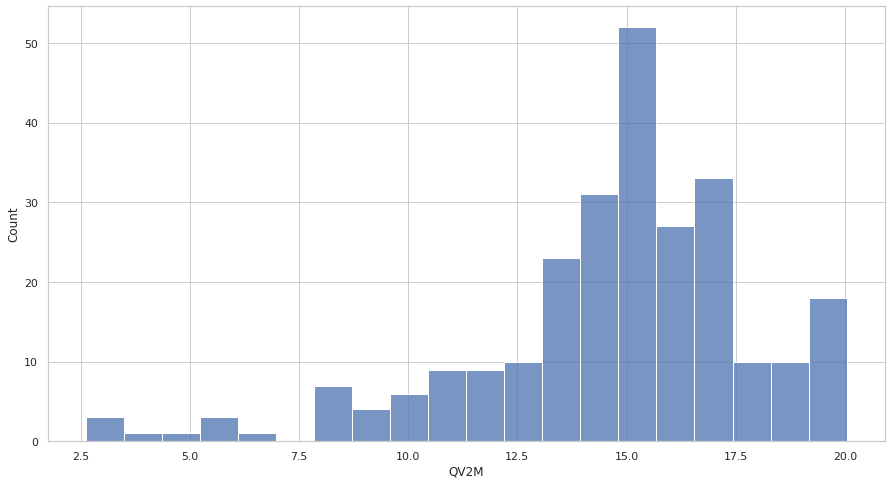

In [131]:
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
sns.histplot(data=landslides_gone, x="QV2M")


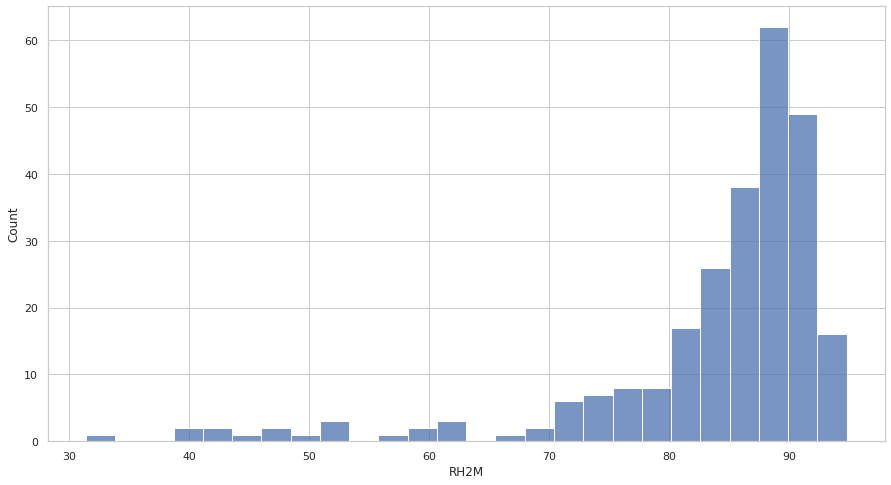

In [132]:
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
sns.histplot(data=landslides_gone, x="RH2M")


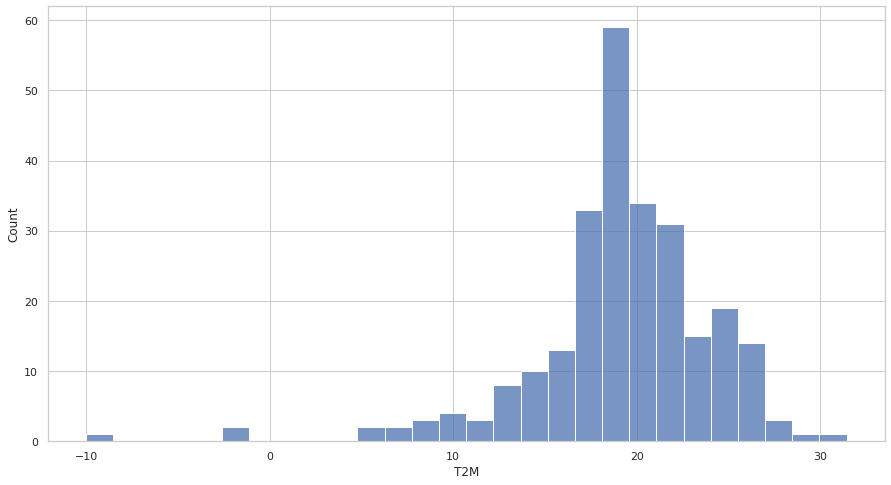

In [133]:
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
sns.histplot(data=landslides_gone, x="T2M")
